In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [41]:
data = yf.download('BTC-USD','2015-01-01','2024-09-13')

[*********************100%***********************]  1 of 1 completed


In [42]:
data = pd.DataFrame(data)

In [43]:
data.reset_index(inplace=True)

In [44]:
data.drop(columns = ['Date','Open','High','Low','Adj Close','Volume'], inplace=True)

In [45]:
data

,Close
0,314.248993
1,315.032013
2,281.082001
3,264.195007
4,274.473999
...,...
3538,54841.566406
3539,57019.535156
3540,57648.710938
3541,57343.171875


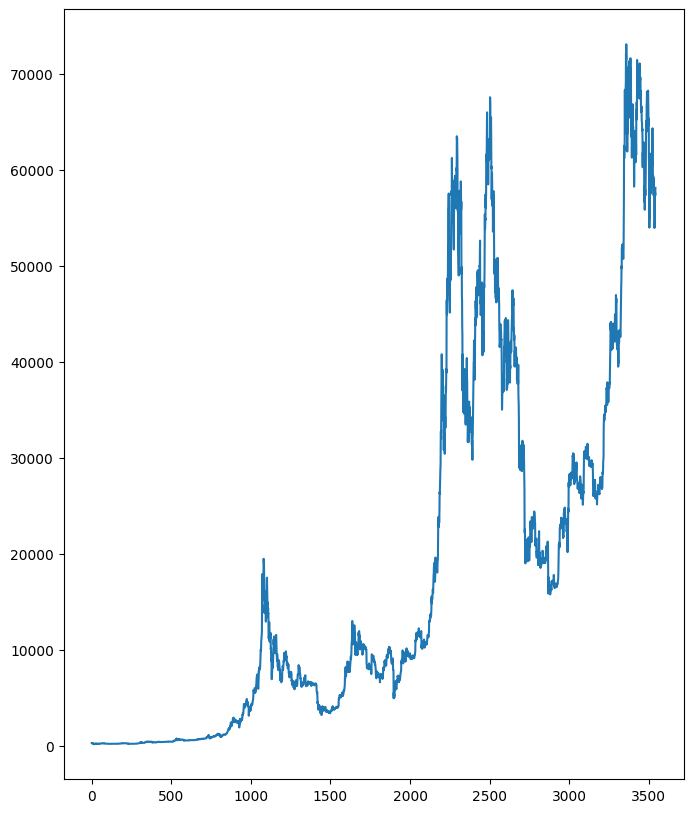

In [46]:
plt.figure(figsize=(8,10))
plt.plot(data)
plt.show()

In [47]:
train_data = data[:-100]
test_data = data[-100:]

In [48]:
train_data.shape

(3443, 1)

In [49]:
test_data.shape

(100, 1)

In [50]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [51]:
train_data_scale = scaler.fit_transform(train_data)

In [52]:
base_days = 100

In [53]:
x = []
y = []
for i in range(base_days, train_data_scale.shape[0]):
    x.append(train_data_scale[i-base_days:i])
    y.append(train_data_scale[i,0])

In [54]:
x, y = np.array(x), np.array(y)

In [55]:
x = np.reshape(x, (x.shape[0],x.shape[1],1))

In [56]:
from keras.layers import LSTM, Dense, Dropout
from keras.models import Sequential

In [59]:
model = Sequential()
model.add(LSTM(50, activation = 'relu', return_sequences=True, input_shape=(x.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(60, activation='relu',return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(80, activation='relu',return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [60]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                       │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_13 (LSTM)                       │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_14 (LSTM)                       │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_15 (LSTM)                       │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [61]:
model.compile(optimizer='adam', loss = 'mean_squared_error')

In [79]:
model.fit(x, y, epochs = 60, verbose =1 )

Epoch 1/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 294ms/step - loss: 0.0172
Epoch 2/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 350ms/step - loss: 0.0294
Epoch 3/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 358ms/step - loss: 0.0298
Epoch 4/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 281ms/step - loss: 0.0298
Epoch 5/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 268ms/step - loss: 0.0395
Epoch 6/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 252ms/step - loss: 0.0313
Epoch 7/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 250ms/step - loss: 0.0172
Epoch 8/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 256ms/step - loss: 0.0198
Epoch 9/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 256ms/step - loss: 0.0223
Epoch 10/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 265ms/step - loss: 0.0125
Epoch 11/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 471ms/step - loss: 0.0168
Epoch 12/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 414ms/step - loss: 0.0103
Epoch 13/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 285ms/step - loss: 0.0129
Epoch 14/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 312ms/step - loss: 0.0119
Epoch 15/60
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 281ms/step - loss: 0.0160
Epoch 16/60
4/4 ━━━

In [80]:
test_data = pd.concat((train_data.tail(100), test_data), ignore_index=True)

In [81]:
test_data

,Close
0,54522.402344
1,57085.371094
2,62504.789062
3,61198.382812
4,62440.632812
...,...
295,54841.566406
296,57019.535156
297,57648.710938
298,57343.171875


In [82]:
test_data_scale = scaler.transform(test_data)

In [83]:
x = []
y = [] 

for i in range(base_days, test_data_scale.shape[0]):
    x.append(test_data_scale[i-base_days:i])
    y.append(test_data_scale[i,0])

In [84]:
x, y = np.array(x), np.array(y)

In [85]:
x = np.reshape(x, (x.shape[0],x.shape[1],1))

In [86]:
pred = model.predict(x)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step


In [87]:
pred = scaler.inverse_transform(pred)

In [88]:
pred

array([[64239.266],
       [64145.64 ],
       [63939.6  ],
       [63641.99 ],
       [63291.363],
       [62940.047],
       [62631.695],
       [62404.375],
       [62316.766],
       [62364.344],
       [62531.695],
       [62794.617],
       [63127.71 ],
       [63498.902],
       [63876.145],
       [64253.03 ],
       [64614.703],
       [64954.293],
       [65248.79 ],
       [65462.684],
       [65546.37 ],
       [65501.28 ],
       [65347.254],
       [65076.82 ],
       [64740.957],
       [64382.66 ],
       [64026.85 ],
       [63696.27 ],
       [63433.566],
       [63291.24 ],
       [63296.465],
       [63439.75 ],
       [63697.805],
       [64024.08 ],
       [64365.48 ],
       [64690.004],
       [64962.707],
       [65129.57 ],
       [65166.28 ],
       [65094.74 ],
       [64947.04 ],
       [64765.42 ],
       [64590.773],
       [64469.492],
       [64410.605],
       [64416.98 ],
       [64476.973],
       [64550.957],
       [64580.484],
       [64543.387],


In [89]:
#future Bitcoin Price

In [90]:
m = y
z= []
future_days = 30
for i in range(base_days, len(m)+future_days):
    m = m.reshape(-1,1)
    inter = [m[-base_days:,0]]
    inter = np.array(inter)
    inter = np.reshape(inter, (inter.shape[0], inter.shape[1],1))
    pred = model.predict(inter)
    m = np.append(m ,pred)
    z = np.append(z, pred)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 588ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [91]:
z = np.array(z)
z = scaler.inverse_transform(z.reshape(-1,1))

In [92]:
z

array([[60657.07695055],
       [60784.32623556],
       [60997.52951631],
       [61277.98375957],
       [61597.47363193],
       [61926.23245642],
       [62238.05686627],
       [62513.62676719],
       [62741.49176593],
       [62917.4671457 ],
       [63043.18246911],
       [63124.34772353],
       [63168.55884349],
       [63184.11573453],
       [63179.05757219],
       [63160.57181396],
       [63134.62048622],
       [63105.8576198 ],
       [63077.63794091],
       [63052.1298542 ],
       [63030.55879076],
       [63013.35495511],
       [63000.49227425],
       [62991.51881615],
       [62985.87401127],
       [62982.87561607],
       [62981.86746001],
       [62982.28028253],
       [62983.59262362],
       [62985.41338824],
       [62987.45577338],
       [62989.48946751],
       [62991.39714214],
       [62993.07015975],
       [62994.49548385],
       [62995.63400493],
       [62996.54221449],
       [62997.23314903],
       [62997.70680856],
       [62998.05010309],


In [93]:
model.save('Bitcoin_Future_Price_prediction_Model.keras')